In [2]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import os 

import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
app_train = pd.read_csv("D:\\Datasets\home-credit-default-risk\\application_train.csv")

print("Training data shape : ",app_train.shape)


Training data shape :  (307511, 122)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv("D:\MachineLearningCourse\Datasets\home-credit-default-risk\\application_test.csv")
print("Test data shape : ",app_test.shape)
app_test.head()

Test data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA
Datayı inceleyerek trendleri istatistiksel bilgileri tespit etmeye çalışırız.

## Examine Target Column Distribution
0 : Loan was repaid , 1 : client had payment difficulties

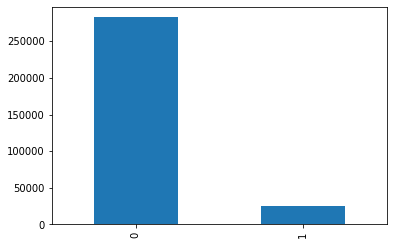

In [6]:
app_train["TARGET"].value_counts().plot(kind="bar")
plt.show()

In [7]:
def missing_values_table(df):
    miss_val_count = df.isnull().sum()
    
    miss_val_percent = 100*miss_val_count/len(df)
    
    
    miss_val_table = pd.concat([miss_val_count,miss_val_percent],axis=1)
    
    miss_val_table_ren_columns = miss_val_table.rename(columns={0:"Missing Values",1:"% of Total Values"})
    
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.loc[:,"% of Total Values"]!=0].sort_values(
    "% of Total Values",ascending=False).round(1)
    
     
    print(f"Your selected dataframe has {df.shape[1]} columns \nThere are {miss_val_table_ren_columns.shape[0]} has missing values.")
    
    return miss_val_table_ren_columns
    

In [8]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns 
There are 67 has missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [9]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
## HER SATIRDAKI UNIQUE CLASS SAYISI
app_train.select_dtypes("object").apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encoding Categorical Variables 
Machine Learning modelleri kategorik değerleri kullanamaz. Bu sebeple bu kategorik değerleri numerik değerlere çevirmemiz gerekir. (LightGBM hariç) <br>
Bunun için 2 yöntem vardır. Bunlar ; <br>

Label Encoding : Her unique değere bir integer değer verilir. "programmer" : 0 , "data scientes" : 1 , "engineer" : 2 şeklinde.

<br>
One Hot Encoding : Her unique değer için bir column oluştur. Bunlardan hangisine ait ise 1 değeri alır. <br>

Label encoding de kategorilere 1 2  3 4 şekliinde değer atamak probleme yol açabilir. Algoritma bu değerlere göre ağırlık verebilir. 2 unique değer olanlarda kullanmak probleme yol açmayabilir<br>
One hot encoding daha güvenli bir yöntemdir. Çünkü kategorilere rastgele sayılar vermez. Dezavantajı ise feature sayısını arttırdığı için boyutu artırmasıdır. Bu problemi çözmek için de one hot encodingten sonra PCA uygulayabiliriz. 


In [14]:
le = LabelEncoder()
le_count = 0

for col in app_train.select_dtypes("object").columns:
    if len(list(app_train[col].unique())) <=2:
        
        le.fit(app_train[col])
        app_train[col] = le.transform(app_train[col])
        app_test[col] = le.transform(app_test[col])
        
        le_count+=1

print("%d columns label encoded"%le_count)

3 columns label encoded


In [15]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

In [16]:
print("Training Feature Shape : ",app_train.shape)
print("Test Feature shape : ",app_test.shape)

Training Feature Shape :  (307511, 243)
Test Feature shape :  (48744, 239)


# Aligning Training and Testing Data
Test ve Train de aynı sayıda feature olması gerekmektedir. Bu sebeple bunları eşitlemeliyiz. <br>
Bunu align ile yapabiliriz.<br>
inner ile soldaki frame ile sağdaki framede aynı columnlar olmasını sağlarız. <br>
left ile soldakinde olanlar kalır <br>
right ile sağdakinde olanlar kalır <br>


In [17]:
train_labels = app_train["TARGET"]

app_train , app_test = app_train.align(app_test,join="inner",axis=1)

app_train["TARGET"] = train_labels

print("Training Feature Shape : ",app_train.shape)
print("Test Feature shape : ",app_test.shape)

Training Feature Shape :  (307511, 240)
Test Feature shape :  (48744, 239)


# Back to the Exploratory Data Analysis
## ANAMOLIES 
EDA yaparken dikkat edilmesi gereken diğer bir hususta anamolilerin tespit edilmesidir. <br> 
Yanlış girilmiş değerler olabilir. Yada çok extrem değerler olabilir. Bunları tespit edip düzeltmek gerekir. Tespit etmek için describe kullanabiliriz. 

In [18]:
### DATADA BULUNAN DAYS_BIRTH COLUMN DA DEĞERLER NEGATIFTIR. 
(app_train["DAYS_BIRTH"] /-365).describe() ##yıla çevirmek için bu şekilde bir işlem yapabilriz. 

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [19]:
app_train["DAYS_EMPLOYED"].describe() ## BURADA MAX OLARAK VERİLEN DEĞER 1000 YIL EDİYOR BURADA PROBLEM VAR. 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

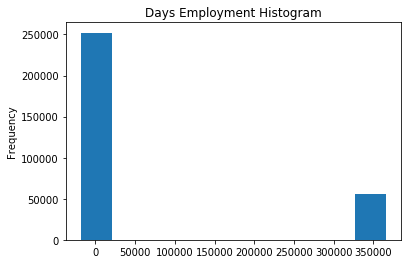

In [20]:
app_train["DAYS_EMPLOYED"].plot.hist(title="Days Employment Histogram")

In [21]:
anom = app_train[app_train["DAYS_EMPLOYED"]==365243]
non_anom = app_train[app_train["DAYS_EMPLOYED"]!=365243]

non_anom_default = non_anom["TARGET"].mean()*100

anom_default = anom["TARGET"].mean()*100


print(f"The non-anomalies default on %{non_anom_default:.2f} of loan ")

print(f"The anon default on %{anom_default:.2f} loan ")

The non-anomalies default on %8.66 of loan 
The anon default on %5.40 loan 


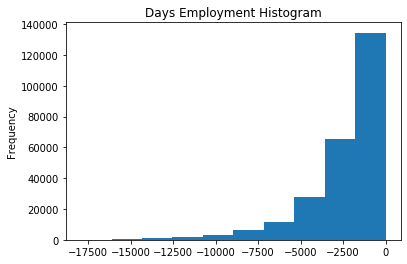

In [22]:
### ANOMALOUS DEĞERLERİ np.nan ile doldurabiliriz daha sonra bunları bir değer ile doldruracağız. 
app_train["DAYS_EMPLOYED_ANOM"] = app_train["DAYS_EMPLOYED"]==365243 ## ANONİMLERİ BOOLEAN OLARAK TUTUYORUZ.

app_train["DAYS_EMPLOYED"].replace({365243:np.nan},inplace=True)

app_train["DAYS_EMPLOYED"].plot(kind="hist",title="Days Employment Histogram")

## Distrubituon daha anlamlı görünüyor. Aynı zamanda anomali olan değerleri tutuyoruz daha sonra bunları median yada mean ile doldurabilriz.

In [23]:
app_test["DAYS_EMPLOYED_ANOM"] = app_test["DAYS_EMPLOYED"]==365243
app_test["DAYS_EMPLOYED"].replace({365243:np.nan},inplace=True)

total_test_anom = app_test["DAYS_EMPLOYED_ANOM"].sum()

print(f"There are {total_test_anom} anomalies in the test data out of {len(app_test)}")


There are 9274 anomalies in the test data out of 48744


# Correlations
Verilerin birbirleri ile olan ilişkilerinin kontrol edilmesi için pearson korelasyona bakabiliriz. 

In [30]:
correlations = app_train.corr()["TARGET"].sort_values()

In [33]:
print("Positive Correlations : ",correlations.tail(15))
print("Negative Correlations : ",correlations.head(15)) 

Positive Correlations :  OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Negative Correla

In [36]:
## Positive Correlationslara baktığımızda yaş ile Default arasında pozitive korelasyon olduğu görülüyor. Ama yaş bilgisi
##negatif olduğu için (bu datada) negatif korelasyon vardır. Yani yaş arttıkça default olma ihtimali azalır. 

app_train["DAYS_BIRTH"] = abs(app_train["DAYS_BIRTH"])
app_train["DAYS_BIRTH"].corr(app_train["TARGET"]) ##negatif korelasyon non-default ihtimali arttığını gösterir. 

-0.07823930830982712

Text(0, 0.5, 'Count')

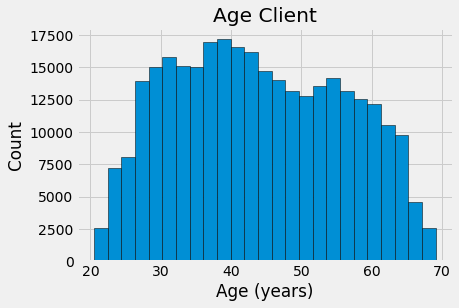

In [47]:
plt.style.use("fivethirtyeight")

plt.hist(app_train["DAYS_BIRTH"]/365,bins=25,edgecolor="k")

plt.title("Age Client")
plt.xlabel("Age (years)")
plt.ylabel("Count")

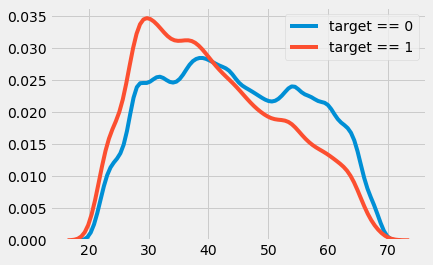

In [81]:
## AGE ve target arasındaki ilşkiyi görebilmek için kernel density estimation(KDE) plotu incelememiz gerekir. Target ile renk
## lendirilmiş. Gauss kernel ile hesaplanır. 

sns.kdeplot(app_train[app_train["TARGET"]==0]["DAYS_BIRTH"]/365,label="target == 0")

sns.kdeplot(app_train[app_train["TARGET"]==1]["DAYS_BIRTH"]/365,label="target == 1")

In [84]:
age_data = app_train[["TARGET","DAYS_BIRTH"]].copy()

age_data["YEARS_BIRTH"] = age_data["DAYS_BIRTH"]/365

age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_BIRTH"],bins=np.linspace(20,70,11))

age_data.head()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [85]:
age_groups = age_data.groupby("YEARS_BINNED").mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


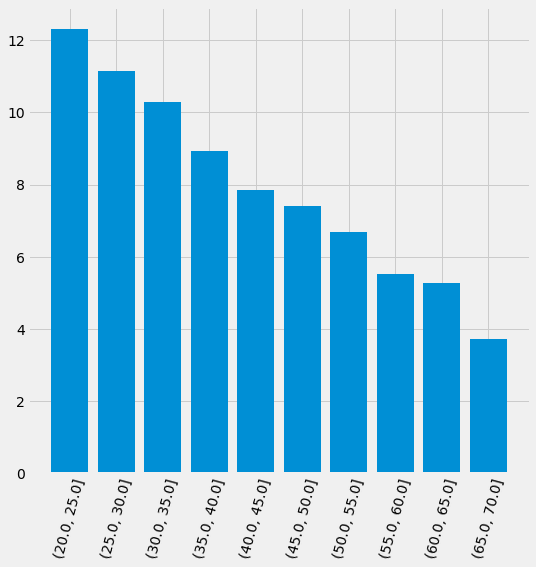

In [86]:
plt.figure(figsize=(8,8))

plt.bar(age_groups.index.astype("str"),100*age_groups["TARGET"])

plt.xticks(rotation=75)

plt.show() ## gençler daha fazla default oluyor

## Exterior Sources 
EXT_SOURCE_1 , 2 ve 3 en yüksek negatif korelasyon olan datalar. Bunların ne olduğu belirsiz. Kredit scorelarının normalize edilmiş hali olabilir. 

In [87]:
ext_data = app_train[["TARGET","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","DAYS_BIRTH"]]

ext_data_corrs = ext_data.corr()

ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1, 'Correlation Heatmap')

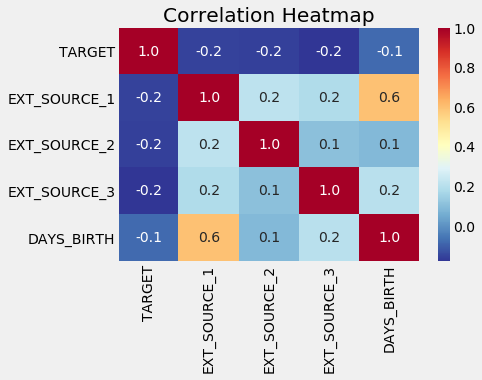

In [91]:
sns.heatmap(ext_data_corrs,annot=True,fmt=".1f",cmap=plt.cm.RdYlBu_r)
plt.title("Correlation Heatmap")

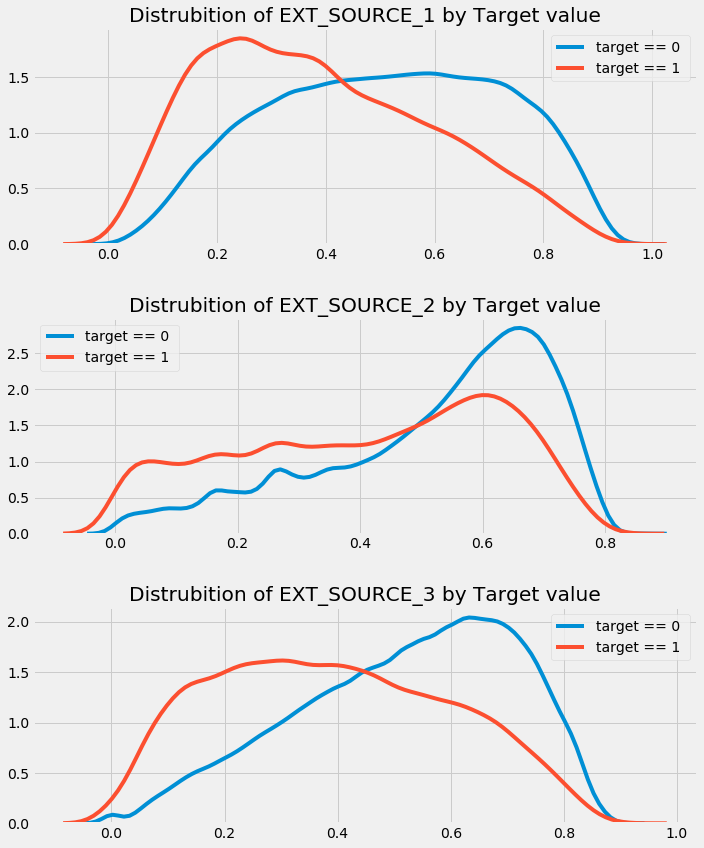

In [92]:
plt.figure(figsize=(10,12))

for i,source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3,1,i+1)
    
    sns.kdeplot(app_train[app_train["TARGET"]==0][source],label="target == 0")
    sns.kdeplot(app_train[app_train["TARGET"]==1][source],label="target == 1 ")
    
    plt.title(f"Distrubition of {source} by Target value")

plt.tight_layout(h_pad=2.5)
    

# PAIRS PLOT 
Multiple çiftlerin ilişkilerini görebilmek için kullanırız. Seaborn da PairGrid kullanılarak yapılabilir. <br>
Üst üçgende scatter plot <br>
çaprazda histogram <br>
alt üçgende kernel density function bulunur. 

C:\Users\bagat\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


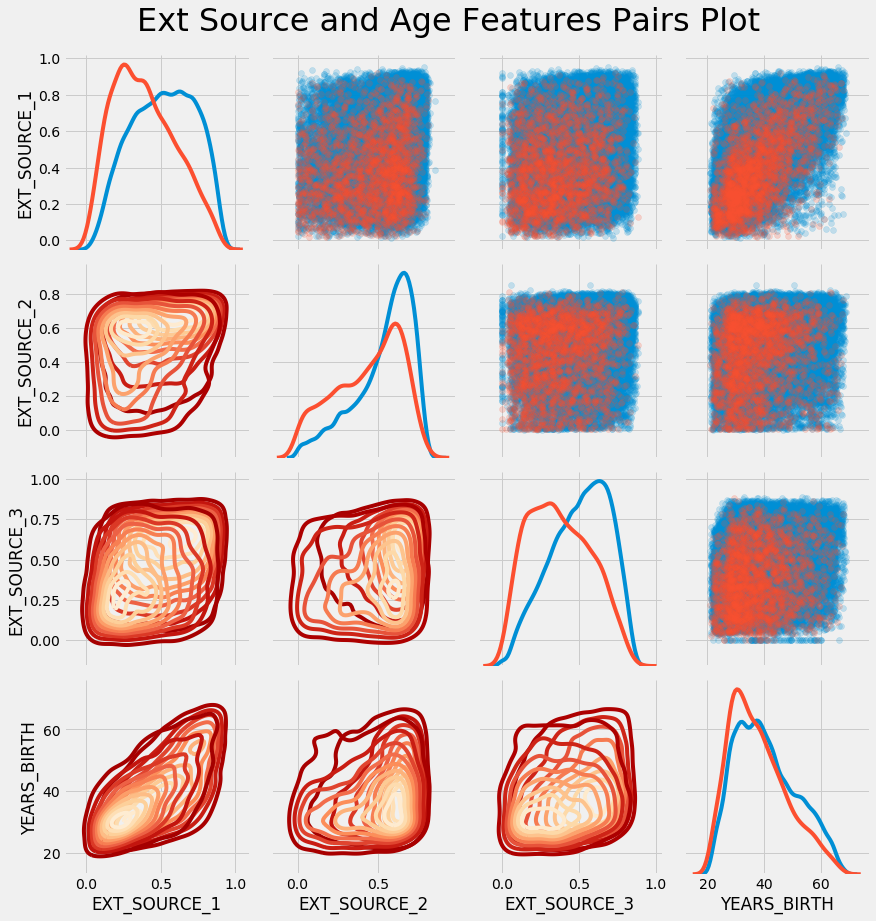

In [95]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

# FEATURE ENGINERING 
Datadan yeni özellikleri oluşturarak bunları modelde kullanma. <br>
Örnek 2 yöntem : 
1. Polynomial Features 
2. Domain Knowledge Features

## Polynomial Features
Mevcut featureların üsleri alınarak yada birbirleriyle çarpılarak yeni featurelar oluşturulması. mesela a,b,c featureları olsun.<br>
a^2,b^2,c^2 polynomial featurelar olur, a*b(interactian term) de yine polynomial featurelardır. <br>

Scikit learn ile belirtilen derecede bu şekilde featurelar oluşturabiliriz. Çok yüksek degree hem datanın boyutunu artıracaktır. Hemde overfite sebep olur. 


In [117]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']].copy()
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']].copy()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")


poly_target = poly_features["TARGET"]

poly_features.drop(["TARGET"],axis=1,inplace=True)

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)


from sklearn.preprocessing import PolynomialFeatures

poly_transformer = PolynomialFeatures(degree=3)

In [119]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)

poly_features_test = poly_transformer.transform(poly_features_test)

print("Polynomial Features shape : ",poly_features.shape)

Polynomial Features shape :  (307511, 35)


In [121]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [123]:
poly_features = pd.DataFrame(poly_features,columns=poly_transformer.get_feature_names(
    input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features["TARGET"] = poly_target


poly_corrs = poly_features.corr()["TARGET"].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))


EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [124]:
poly_features_test = pd.DataFrame(poly_features_test,columns=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features["SK_ID_CURR"] = app_train["SK_ID_CURR"]

app_train_poly = app_train.merge(poly_features,on="SK_ID_CURR",how="left")

poly_features_test["SK_ID_CURR"] = app_test["SK_ID_CURR"]

app_test_poly = app_test.merge(poly_features_test,on="SK_ID_CURR",how="left")

app_train_poly ,app_test_poly = app_train_poly.align(app_test_poly,join="inner",axis=1)


print("Training data with polynomial features shape ",app_train_poly.shape)

print("Testing data with polynomial features shape",app_test_poly.shape)


Training data with polynomial features shape  (307511, 275)
Testing data with polynomial features shape (48744, 275)


# Domain Knowledge Features
Belli featureları ilişkilendirerek daha kompile featurelar oluşturmak. <br>
CREDIT_INCOME_PERCENT , ANNUITY_INCOME_PERCENT, CREDIT_TERM, DAYS_EMPLOYED_PERCENT

In [128]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [129]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

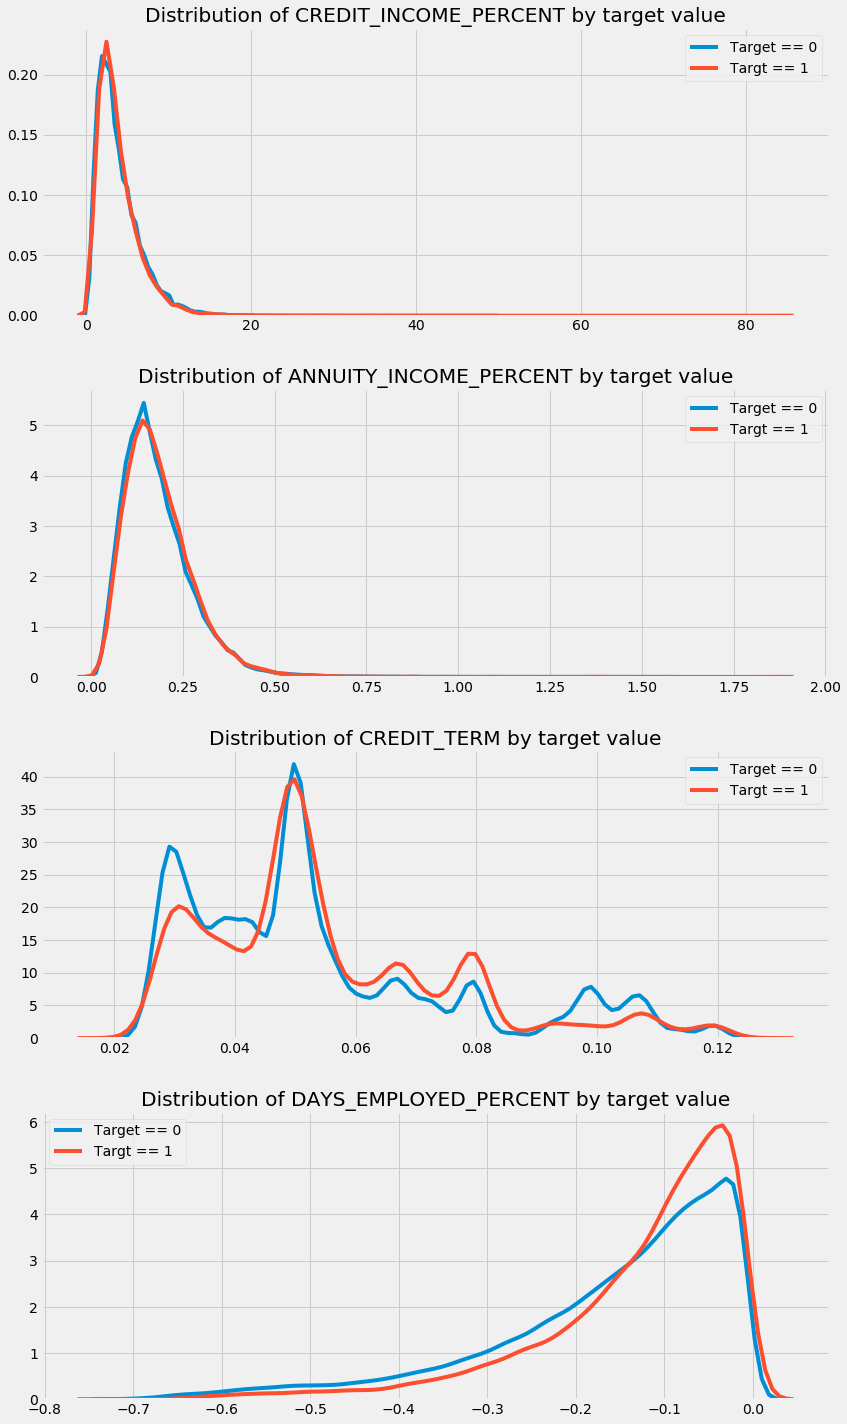

In [133]:
plt.figure(figsize=(12,20))

for i , col in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    plt.subplot(4,1,i+1)
    
    sns.kdeplot(app_train_domain[app_train_domain["TARGET"]==0][col],label="Target == 0")
    sns.kdeplot(app_train_domain[app_train_domain["TARGET"]==1][col],label="Targt == 1")
    
    plt.title(f"Distribution of {col} by target value")
    

plt.tight_layout(h_pad=2.5)
    

# BASELINE 
Classification problemlerinde random search yaparsak .5 auc elde ederiz. Bu baseline olarak belirlenebilir. Daha farklı modeller deneyerek de baseline tercih edilebilir. <br>
## LOGISTIC REGRESSION 
Logistic regression da öncelikle missiing valuleri median ile doldurup ardından scale işlemi yapmamı gerekiyor. <br>
Logistic regression da bulunan C regularization parametresi ile de overfit problemini çözmeye çalışabiliriz. Lower C higher regularization 


In [134]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

if "TARGET" in app_train:
    train = app_train.drop(["TARGET"],axis=1)
else :
    train = app_train.copy()


features = list(train.columns)

test = app_test.copy()

imputer = SimpleImputer(strategy = "median")

scaler = MinMaxScaler(feature_range=(0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

print("Training data shape : ",train.shape)
print("Testing data shape : ",test.shape)

Training data shape :  (307511, 240)
Testing data shape :  (48744, 240)


In [136]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=.0001)

log_reg.fit(train,train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
log_reg_pred = log_reg.predict_proba(test)[:,1]

In [141]:
submit = app_test[["SK_ID_CURR"]].copy()

submit["TARGET"] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [142]:
submit.to_csv("log_reg_baseline.csv",index=False)

# IMPROVED MODEL : RANDOM FOREST
Modelin başarısı geliştirmek için başka modeller kullanabiliriz. 

In [144]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100,random_state=50,verbose=1,n_jobs=-1)

rfc.fit(train,train_labels)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [145]:
feature_importance_values = rfc.feature_importances_

feature_importances = pd.DataFrame({"feature":features,"importance":feature_importance_values})

predictions = rfc.predict_proba(test)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished


In [146]:
submit = app_test["SK_ID_CURR"]
submit["TARGET"] = predictions

submit.to_csv("random_forest_baseline.csv",index=False)

# Making Predictions using Engineered Features


In [147]:
poly_features_names = list(app_train_poly.columns)

imputer = SimpleImputer(strategy="median")

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range=(0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators=100,random_state=50,n_jobs=-1)

In [148]:
random_forest_poly.fit(poly_features,train_labels)

predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

In [149]:
submit = app_test["SK_ID_CURR"]
submit["TARGET"] = predictions

submit.to_csv("random_forest_baseline_engineered.csv")

## Testing domain Features


In [150]:
app_train_domain = app_train_domain.drop(["TARGET"],axis=1)

domain_feature_names = list(app_train_domain.columns)

imputer = SimpleImputer(strategy="median")

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)


scaler = MinMaxScaler()

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain= RandomForestClassifier(n_estimators=100,n_jobs=-1,)

random_forest_domain.fit(domain_features,train_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [192]:

feature_importances_values_domain = random_forest_domain.feature_importances_
features_impotances_domain = pd.DataFrame({"feature":domain_feature_names,"importance":feature_importances_values_domain})


predictions = random_forest_domain.predict_proba(domain_features_test)[:,1]

In [193]:
submit = app_test[["SK_ID_CURR"]].copy()
submit["TARGET"] = predictions

submit.to_csv("random_forest_baseline_domain.csv",index=False)

## Model Interpretation : Features importances
Feature importances ile önemli özellikleri tespit edebiliriz. 

In [194]:
def plot_importances(df):
    
    df = df.sort_values(by="importance",ascending=False)[:15]    
    
    plt.figure(figsize=(12,6))
    
    plt.barh(df.feature,df.importance,edgecolor="k",align="center")
    plt.gca().invert_yaxis()
    


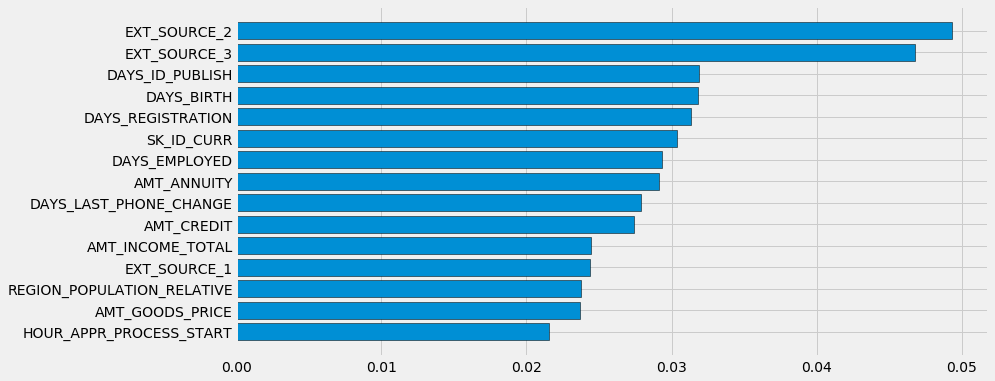

In [195]:
plot_importances(feature_importances)

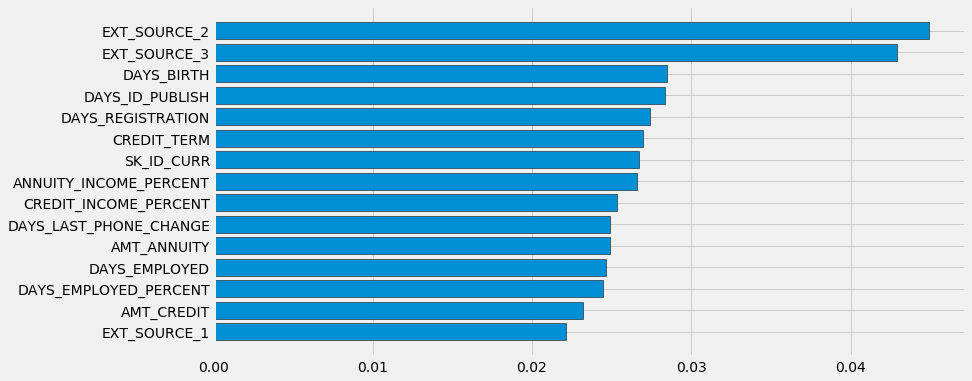

In [196]:
plot_importances(features_impotances_domain)